# Multi-layer Perceptron Mạng thần kinh nhân tạo

   ## Cơ sở toán học
   Với dữ liệu không linearly separable tức không thể tìm một biên phân chia hai class. Nếu thay PLA bằng Logistic Regression, tức thay hàm activation function từ sgn sang sigmoid, ta cũng không tìm được các hệ số thỏa mãn, vì về bản chất, Logistic Regression cũng chỉ tạo ra các đường biên có dạng tuyến tính. Như vậy là các mô hình Neural Network chúng ta đã biết không thể biểu diễn được hàm số logic đơn giản này. 
    Nói một cách khác với nhiều bộ dữ liệu (out put đầu vào khách nhau) chúng ta không thể dùng các ranh giới là các đường thẳng để vạch định biên giới. Như ranh giới quốc gia chúng ta không thể nào có thể dùng đường thẳng để vạch được. Thay vào đó chúng ta sử dụng các đường thẳng cố tính chất khác sao cho nó phù hợp nhất, độ chính xác cao hơn. Tôi sẽ trình bày nó ở phần sau. Mục tiêu của thuật toán cuối cùng sẽ là tìm các tham số của các đường biên để có khả năng phân loại cao nhất.
   ## Sự diễn giải
   Nói một cách khác MLP mô tả cách thức hoạt động của bộ não gọi là mạng thần kinh nhân tạo. Một cách mô tả đơn giản mạng thần kinh ấy gồm có nhiều nút và liên kết với các nút khác theo một quy tắc nhất định dùng để truyền thông tin. 

## Các khái niệm cần nắm trong mạng neural network (NEURAL NETWORK)
### 1. Layers
Ngoài Input layers và Output layers, một Multi-layer Perceptron (MLP) có thể có nhiều Hidden layers ở giữa. Các Hidden layers theo thứ tự từ input layer đến output layer được đánh số thứ thự là Hidden layer 1, Hidden layer 2, …
Số lượng layer trong một MLP được tính bằng số hidden layers cộng với 1. Tức là khi đếm số layers của một MLP, ta không tính input layers. Số lượng layer trong một MLP thường được ký hiệu là L.
Input layer là lớp nhận dữ liệu đầu vào. Ví dụ như tai chúng ta nghe âm thanh, sẽ thu lại thông tin về trường độ, cao độ, độ to thì trường độ, cao độ, độ to chính là các đầu vào $x_1, x_2, .., x_n$. Các thông tin đầu vào được gọi chung là *features* của dữ liệu.

### 2. Units
Một node hình tròn trong một layer được gọi là một unit. Unit ở các input layer, hidden layers, và output layer được lần lượt gọi là input unit, hidden unit, và output unit. Đầu vào của các hidden layer được ký hiệu bởi z, đầu ra của mỗi unit thường được ký hiệu là a (thể hiện activation, tức giá trị của mỗi unit sau khi ta áp dụng activation function lên z). Đầu ra của unit thứ itrong layer thứ l được ký hiệu là $a_i^{(l)}$. Giả sử thêm rằng số unit trong layer thứ l (không tính bias) là $d^{(l)}$. Vector biểu diễn output của layer thứ l được ký hiệu là $\mathbf{a}^{(l)} \in \mathbb{R}^{d^{(l)}}$.

### 3. Weights và Biases
Các đặc trưng của dữ liệu sẽ được biểu các con số. Chẳng hạn như một củ cà rốt một trong cách mô tả đặc trưng nó là đó là lấy màu sắc của củ cà rốt theo kênh màu R G B tương tự ta được bộ dữ liệu [ x1, x2, x3 ]. 
Các thông tin được truyền đến neuron bằng cách nhân với một ma trận trọng số, ma trận trọng số đó là weight.
\begin{align*}
    \begin{bmatrix}
        x_1 & x_2 & x_3 & ... & x_n
    \end{bmatrix}
    %
    \begin{bmatrix}
        w_1 \\ 
        w_2 \\
        w_3 \\
        ... \\
        w_n
    \end{bmatrix}
    =
    \begin{bmatrix}
        x_1w_1 + x_2w_2 + x_3w_3 + ... + x_nw_n
    \end{bmatrix}
\end{align*}

###  4 .Activation functions
Mỗi output của một unit (trừ các input units) được tính dựa vào công thức:
$a_i^{(l)} = f(\mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)})$
f(.) đó chính là hàm kích hoạt.
Activation functions sử dụng trong mô hình MLP
ReLU (Rectified Linear Unit) được sử dụng rộng rãi gần đây vì tính đơn giản của nó. Đồ thị của hàm ReLU được minh họa trên Hình 5 (trái)). Nó có công thức toán học f(s)=max(0,s) - rất đơn giản. Ưu điểm chính của nó là:
ReLU được chứng minh giúp cho việc training các Deep Networks nhanh hơn rất nhiều (theo Krizhevsky et al.). Hình 5 (phải) so sánh sự hội tụ của SGD khi sử dụng hai activation function khác nhau: ReLU và tanh. Sự tăng tốc này được cho là vì ReLU được tính toán gần như tức thời và gradient của nó cũng được tính cực nhanh với gradient bằng 1 nếu đầu vào lớn hơn 0, bằng 0 nếu đầu vào nhỏ hơn 0.Mặc dù hàm ReLU không có đạo hàm tại s=0, trong thực nghiệm, người ta vẫn thường định nghĩa ReLU′(0)=0 và khẳng định thêm rằng, xác suất để input của một unit bằng 0 là rất nhỏ.
Hàm ReLU có nhiều biến thể khác như Noisy ReLU, Leaky ReLu, ELUs. 

## Các phương pháp huấn luyện ANN
### 1.Feed-Forward (Huấn luyện xuôi)
Tại mỗi lớp (layer) trừ input layer sẽ nhận đầu vào là layer trước nhân với ma trận *weights* (trọng số) tương ứng, cứ như thế lớp này nhân ma trận *weights* là input của lớp sau, lan truyền như vậy đến output layer thì kết thúc
### 2.Back-Propagation (Lan truyền ngược)
Trong lan truyền xuôi, các layer đằng trước không nhận được thông tin và không biết gì về các layer đằng sau, cụ thể là trong mô hình phía trên ta khó có thể biết được khi thay đổi ma trận *weights* của input layer thì nó ảnh gì tới output layer. Do đó người dùng đạo hàm, và áp dụng quy tắc *chuỗi đạo hàm đa biến (chain rule)* (tự tìm hiểu nhé, mình quên link nó ở đâu rồi- trí nhớ xót lại sau những cuộc tìm kiếm: cuốn book_ML.pdf trang -33 nhưng không đầy đủ ) để các layer không kết nối trực tiếp như input layer và output layer có được thông tin của nhau. Và chúng ta có 2 kiểu đạo hàm là tiến và ngược. Trong khuôn khổ bài viết này, chúng ta không bàn tới đạo hàm tiến và ngược vì để phân tích và so sánh chúng ta cần hiểu biết về giải tích và khái niệm *computational graph*, tuy nhiên nhìn vào cái tên chúng ta có thể dự đoán được là thuật toán này sử dụng đạo hàm ngược. Và lí do tại sao lại sử dụng đạo hàm ngược sao? Với một hàm số 1 triệu biến, đạo ngược sẽ nhanh gấp 1 triệu lần đạo hàm tiến.
Tôi sẽ viết một bài về di truyền ngược hiện tại thì tôi chỉ mong muốn các bạn hiểu được ý tưởng chúng ta làm gì và sử dụng thư viện có sẵn để lập trình cho bài toán cụ thể.

Chúng ta có thể tìm đọc thêm tại https://machinelearningcoban.com/2017/02/24/mlp/. Còn bây giờ bắt đầu ngay vào ví dụ minh họa.


In [2]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

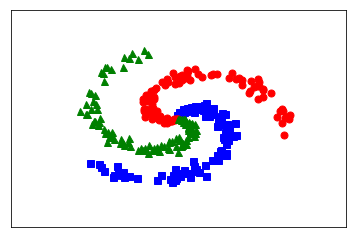

In [11]:
np.random.seed(4)
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
X = X.T
plt.show()


Chúng ta chia tập dữ liệu trên thành 2 phần dùng train và đánh giá mô hình. 
300 dữ liệu dùng 200 làm dữ liệu tạo mô hình và 100 để đánh giá mô hình

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

print("So luong test tạo mô hình : ", X_train.shape[0])


So luong test tạo mô hình :  200


Xây dựng mô hình bằng thư viện

In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter= 20000).fit(X_train, y_train)

Đánh giá mô hình 

In [14]:
predict = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 95.0


In [ ]:
95 % cũng không tệ đúng không.
Thử thay đổi số hiden xem sao

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(10,7,5),max_iter= 20000).fit(X_train, y_train)
predict = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 99.0


Thay đổi tiếp nữa nào : 

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(12,8,6,4),max_iter= 20000).fit(X_train, y_train)
predict = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 97.0


In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(16,12,8,6,4),max_iter= 20000).fit(X_train, y_train)
predict = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 32.0


Có lẽ đây là tối đa nó có thể thực hiện được rồi.

Bạn có thể vẽ matplotlib để thành thúc kĩ năng nhé . như những bài trước trong phần tự luyện mình có làm.

Thử với SVM xem sao 

Đọc SVM rồi so sánh nhé


In [38]:
from sklearn import svm
clf = svm.SVC(C = 100).fit(X_train, y_train)
predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 96.0


C:\Users\trung\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Thử thay đổi vài thông số xem 

In [37]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', C=100).fit(X_train, y_train)
predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 97.0


Cũng khá ấn tượng chứ.

In [34]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=1, C = 100).fit(X_train, y_train)
predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Hieu qua mo hinh dat :", 100* accuracy_score(y_test, predict.tolist() ) )

Hieu qua mo hinh dat : 97.0
